In [1]:
import gc
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.svm.classes import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble.forest import RandomForestRegressor

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
C:\Users\TOHEEB\anaconda3\envs\playground\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
def generate_dataset(n_samples, n_features, noise=0.1):
    
    print("generating dataset...")

    x, y, coef = make_regression(n_samples=n_samples,
                                 n_features=n_features, 
                                 noise=noise, coef=True)

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=5)

    x_scaler = StandardScaler()
    x_train = x_scaler.fit_transform(x_train)
    x_test = x_scaler.transform(x_test)

    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
    y_test = y_scaler.transform(y_test[:, None])[:, 0]

    gc.collect()
    
    print('dataset generation complete...')
    
    return x_train, y_train, x_test, y_test

In [4]:
 def build_and_train_model(x_train, y_train, model):
        
        training_latencies = []
        
        for i in range(20):
            start = time.time()
            
            model.fit(x_train, y_train)
            
            training_latencies.append(time.time() - start)
            
        return training_latencies

In [5]:
x_train, y_train, x_test, y_test = generate_dataset(10000, 100)

generating dataset...
dataset generation complete...


In [6]:
x_train.shape, x_test.shape

((8000, 100), (2000, 100))

In [7]:
linear_model = LinearRegression()

lasso_model = Lasso(alpha = 0.8)

sgd_model = SGDRegressor(penalty = 'elasticnet', alpha = 0.01,
                         l1_ratio = 0.25, tol = 1e-4)

sv_model = SVR(kernel = 'rbf', gamma = 'scale')

dt_model = DecisionTreeRegressor(max_depth = 10)

rf_model = RandomForestRegressor(n_estimators = 20)

In [8]:
training_latencies_dict = {}

In [10]:
training_latencies_dict['linear'] = build_and_train_model(x_train, y_train, linear_model)

In [11]:
training_latencies_dict['lasso'] = build_and_train_model(x_train, y_train, lasso_model)

In [12]:
training_latencies_dict['sv'] = build_and_train_model(x_train, y_train, sv_model)

In [13]:
training_latencies_dict['dt'] = build_and_train_model(x_train, y_train, dt_model)

In [14]:
training_latencies_dict['rf'] = build_and_train_model(x_train, y_train, rf_model)

In [15]:
training_latencies_df = pd.DataFrame()

for key in training_latencies_dict:
    training_latencies_df[key] = training_latencies_dict[key]

In [16]:
training_latencies_df

,linear,lasso,sv,dt,rf
0,1.822556,0.314143,3.956414,0.858233,10.618294
1,0.034980,0.019992,3.704109,0.789569,10.801698
2,0.033980,0.011354,3.641412,0.658687,11.566206
3,0.036978,0.015625,4.522357,0.750123,12.191551
4,0.073960,0.015629,3.824861,0.773388,12.884162
5,0.047972,0.015641,4.183688,1.136367,15.669883
6,0.047973,0.015601,4.824902,0.759993,28.117859
7,0.043974,0.015624,4.869036,0.723588,11.405119
8,0.045975,0.015626,4.837239,0.860508,9.220965
9,0.043975,0.015625,4.910035,1.684077,8.897993


<AxesSubplot:>

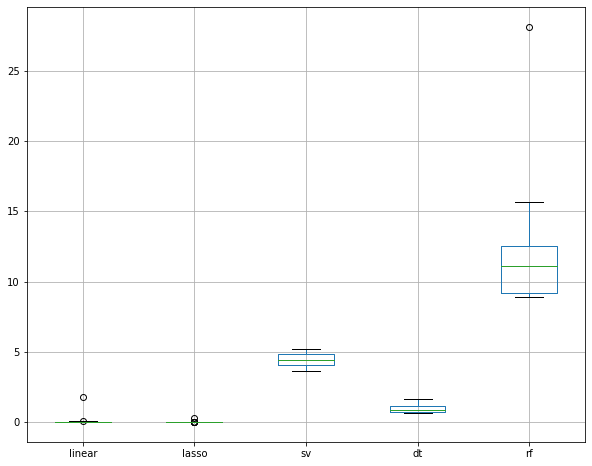

In [17]:
training_latencies_df.boxplot(figsize=(10, 8))